# Monte Carlo Simulation for Estimating the Volume of a d-Ball

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def estimate_d_ball_volume(d, n=100000, seed=12345):
    """
    Estimate the volume of a d-dimensional ball using Monte Carlo simulation.
    
    Parameters:
        d (int): The dimension of the ball.
        n (int): The number of random points to generate. Default is 100,000.
        seed (int): Seed for the random number generator for reproducibility. Default is 12345.
        
    Returns:
        tuple: Estimated volume and standard deviation of the estimate, along with the points and inside points mask.
    """
    rng = np.random.default_rng(seed)  # Seed for reproducibility

    # Generate n random points in d-dimensional space
    points = rng.uniform(low=-1, high=1, size=(n, d))

    # Calculate the number of points inside the d-ball
    distances = np.linalg.norm(points, axis=1)  # Computes the Euclidean distance
    inside_points = distances <= 1

    # Calculate the volume of the d-ball
    fraction_inside = np.sum(inside_points) / n
    volume_estimate = (2 ** d) * fraction_inside  # 2^d accounts for the volume of the cube [-1, 1]^d
    sigma = (2 ** d) / np.sqrt(n) * np.sqrt((fraction_inside * (1 - fraction_inside))) # sigma = V / sqrt(n) * sigma_f

    return volume_estimate, sigma, points, inside_points

In [5]:
# Example usage and plotting
d = 2  # Dimension of the ball
n = 100000  # Number of random points

# Estimate volume and get points and inside_points mask
volume, sigma, points, inside_points = estimate_d_ball_volume(d, n)

In this case, we estimate the volume of a high-dimensional sphere, known as a $d$-ball, by generating random points within a bounding hypercube and determining how many fall inside the $d$-ball.
- Monte Carlo Method: This method leverages random sampling to estimate the volume of complex shapes like a $d$-ball. By generating numerous random points within a defined space, we can approximate the volume based on the proportion of points that fall inside the shape.
- Bounding Hypercube: For a $d$-dimensional ball, the bounding hypercube spans from $[-1, 1]$ in each dimension, ensuring that the $d$-ball is entirely enclosed.
- Euclidean Distance: Points within the bounding hypercube are checked against the Euclidean distance from the origin. If this distance is less than or equal to $1$, the point lies within the $d$-ball.
- Volume Estimation: The fraction of points inside the $d$-ball is multiplied by the volume of the hypercube ($2^d$) to estimate the $d$-ball's volume. The standard deviation of this estimate is calculated to provide an uncertainty measure.

To visualize the Monte Carlo simulation for estimating the volume of a $2$-dimensional ball (circle), we can plot the random points generated and distinguish those that fall inside the circle from those that fall outside.

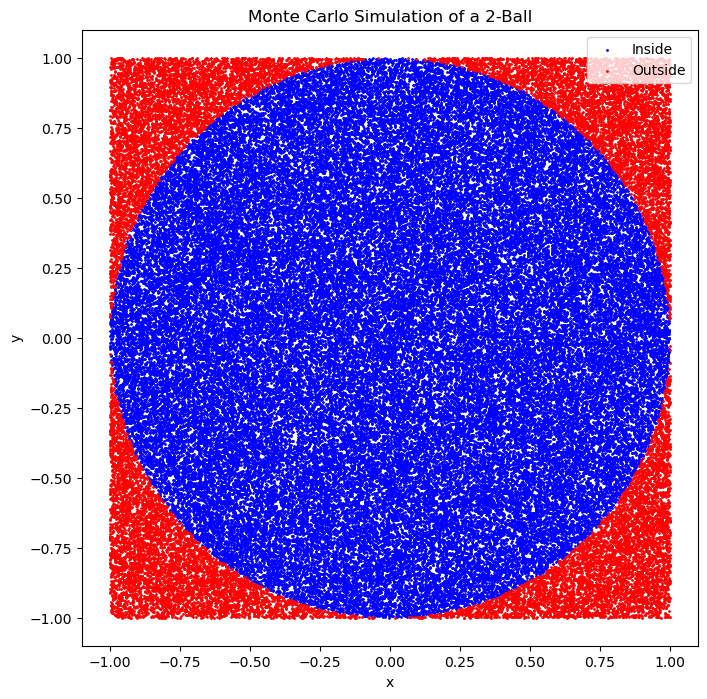

Estimated 2-ball volume = 3.1374 +/- 0.0052


In [6]:
# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(points[inside_points][:, 0], points[inside_points][:, 1], color='blue', s=1, label='Inside')
plt.scatter(points[~inside_points][:, 0], points[~inside_points][:, 1], color='red', s=1, label='Outside')
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'Monte Carlo Simulation of a {d}-Ball')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.show()

# Output the volume estimate
print(f"Estimated {d}-ball volume = {volume} +/- {sigma:.4f}")
